In [19]:
#!pip install utils
#pip install pymysql
#import ipynb_importer
import numpy as np
import matplotlib.pyplot as plt

#from utils import *
%matplotlib inline


#下面是一些用于画图的函数
def draw_line(p1, p2, style="ob:", linewidth=1):
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], style, linewidth=linewidth)

def plot_data_points(X, idx):
    # plots data points in X, coloring them so that those with the same
    # index assignments in idx have the same color
    plt.scatter(X[:, 0], X[:, 1], c=idx)

def plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i):
    # Plot the examples point
    plot_data_points(X, idx)
    
    # Plot the centroids as black 'x's
    plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', c = 'k', linewidths=3)
    
    # Plot history of the centroids with lines
    for j in range(centroids.shape[0]):
        draw_line(centroids[j, :], previous_centroids[j, :])
    
    plt.title("Iteration number %d" %i)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]] 

 [[24 23 22 21 20 19]
 [18 17 16 15 14 13]
 [12 11 10  9  8  7]
 [ 6  5  4  3  2  1]]


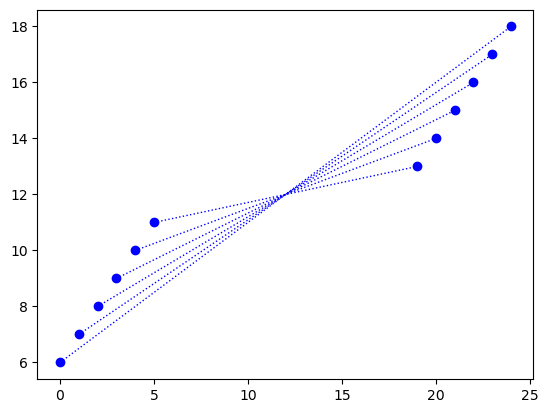

In [20]:
#让我们来测试一下画图函数,以便知道这些画图函数的作用
a=np.arange(24).reshape(4,6);
b=np.arange(24,0,-1).reshape(4,6)

print(a,"\n\n",b)

draw_line(a,b)

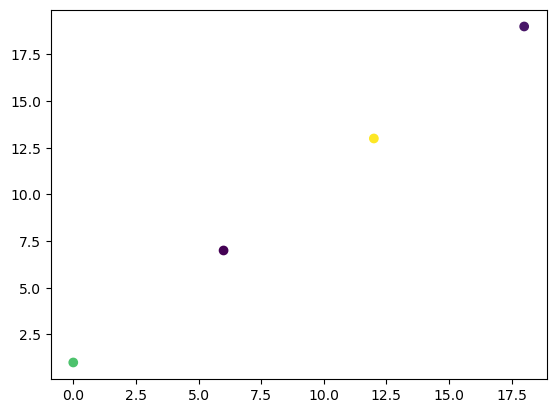

In [21]:
aidx=np.random.rand(a.shape[0])

plot_data_points(a,aidx)

#Initialize centroids
#K is the number of clusters
cnentroids = KMeans_init_centroids(X,K)

for iter in range(iterations):
    #聚类的步骤为:
    #对于每一个数据点，找到离它最近的簇
    #idx[i] 代表着下标为i的簇
    
    idx=find_closet_centroids(X,centroid)
    
    centroids = compute_means(X,idx,K)

内部循环算法重复两个步骤：
    1.将每个样本点合并到离它最近的簇内
    2.重新计算每个簇的中心点
    
    

1.实现find_closest_centroids函数

In [22]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): k centroids
    Returns:
        idx (array_like): (m,) closest centroids
    """ 
    
    numberOfCentroids=centroids.shape[0]
    numberOfSample=X.shape[0]
    
    #idx[i]表示第i个样本点属于id[i]个中心
    idx=np.zeros(numberOfSample)
    
    for i in range(numberOfSample):
        distance=[]
        for j in range(numberOfCentroids):
            #第i个样本和第j个中心点的距离，使用的是二范数也就是欧氏距离
            distanceOfi_j=np.linalg.norm(X[i]-centroids[j])
            distance.append(distanceOfi_j)
        #距离哪个中心点更近就属于哪个簇
        idx[i]=np.argmin(distance)
    
    return idx

2.计算中心点的平均值

In [23]:
def compute_centroids(X, idx, numberOfCentroids):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    
    # 每个样本点在X中以行向量表示
    numberOfSample, dimention = X.shape
    
    
    
    # 计算加入新的数据之后新的中心点
    centroids = np.zeros((numberOfCentroids, dimention))
    
    for k in range(numberOfCentroids):   
        #遍历为一个簇的编号，找到属于这个簇的样本，numpy提供了极简的写法
        points = X[ idx == k ]  #get a list of all data points in X assigned to centroid k  
        
        #计算中心点的值并更新
        centroids[k] = np.mean(points, axis = 0)# compute the mean of the points along with axis=0 
    
    
    return centroids

3.KMeans主代码

In [24]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    numberOfSample, dimention = X.shape
    
    #簇的个数
    numberOfCentroids = initial_centroids.shape[0]
    
    
    centroids = initial_centroids
    previous_centroids = centroids
    
    
    idx = np.zeros(numberOfSample)
    
    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i+1, max_iters))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, numberOfCentroids)
    
    plt.show() 
    return centroids, idx

4.随机初始化中心

In [25]:

#random initialization
def kMeans_init_centroids(X, numberOfCentroids):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    centroids = X[randidx[:numberOfCentroids]]
    
    return centroids



5.准备数据

(128, 128, 3)

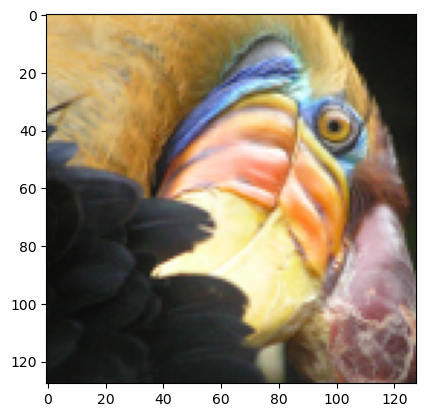

In [26]:
# Load an image of a bird
original_img = plt.imread('D:/作业/机器学习/picture/bird_small.png')
plt.imshow(original_img)

original_img.shape

In [27]:
# Divide by 255 so that all values are in the range 0 - 1
original_img = original_img / 255

# Reshape the image into an m x 3 matrix where m = number of pixels
# (in this case m = 128 x 128 = 16384)
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X_img that we will use K-Means on.

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))
#X_img=np.array([[-1, -1], [-1.5, -1.5], [-1.5, 1],
#                 [-1, 1.5], [2.5, 1.5], [-1.1, -1.7], [-1.6, 1.2]])

K = 10                       
max_iters = 10   

X_img

array([[0.00336794, 0.00276817, 0.00158401],
       [0.0035371 , 0.00284506, 0.00178393],
       [0.00347559, 0.00286044, 0.00169166],
       ...,
       [0.00099962, 0.00066128, 0.00059977],
       [0.00089196, 0.00056901, 0.00058439],
       [0.00079969, 0.00059977, 0.00052288]], dtype=float32)

K-Means iteration 1/10
K-Means iteration 2/10
K-Means iteration 3/10
K-Means iteration 4/10
K-Means iteration 5/10
K-Means iteration 6/10
K-Means iteration 7/10
K-Means iteration 8/10
K-Means iteration 9/10
K-Means iteration 10/10


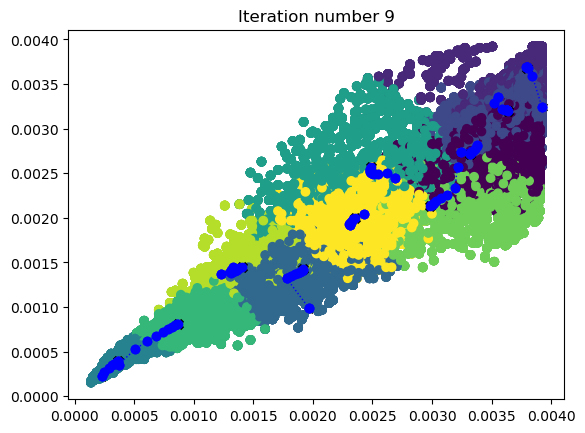

Shape of idx: (16384,)
Closest centroid for the first five elements: [0. 0. 0. 0. 0.]


In [28]:
initial_centroids = kMeans_init_centroids(X_img, K) 

centroids, idx = run_kMeans(X_img, initial_centroids, max_iters,True) 

print("Shape of idx:", idx.shape)

print("Closest centroid for the first five elements:", idx[:5])

In [29]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (16384,)
Closest centroid for the first five elements: [0. 0. 0. 0. 0.]


In [30]:
# Represent image in terms of indices
idx=idx.astype(np.int64)
X_recovered = centroids[idx, :] 

# Reshape recovered image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape) 

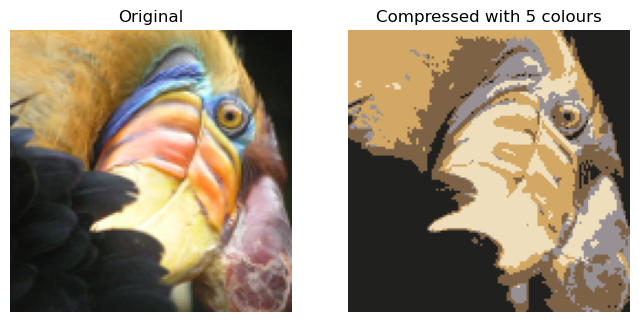

In [18]:


# Display original image
fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(original_img*255)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()




    读取并预处理图像：首先，读取原始图像，并将其从RGB空间转换到Lab颜色空间或者更简单的HSV空间，因为这些颜色空间更能体现人类对色彩的感知，有助于提高压缩后的图像质量。然后，将图像展平为一个二维数组，其中每一行代表一个像素的颜色值。

    应用KMeans聚类：使用KMeans算法对这些像素颜色值进行聚类。K值（聚类数量）决定了压缩后图像的颜色丰富度，较小的K值会使得图像颜色更加单一，但压缩效果更明显。聚类的结果是每个像素都会被分配到最近的一个颜色中心点。

    生成新的调色板：KMeans聚类的中心点就是新的调色板，每个中心点代表一个颜色。

    映射像素到新颜色：遍历原始图像的每一个像素，找到该像素颜色在新调色板中最接近的颜色（通常使用欧氏距离作为相似度度量），然后用这个最接近的颜色替换原像素颜色。

    重构图像：最后，使用映射后的新颜色值重构图像，得到压缩后的图像。
